# Gesture Set Processing (2D)
From the Kaggle Dataset containing Accelerometer and Gyroscope values drawn by smart
watches, we process the values contained in it.

## Step 1: Initialization

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from caits import visualization, filtering, properties
from caits.fe import _spectrum, _statistical
from caits.eda import correlation
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
data = pd.read_csv(
    "./data/Gestures/GestureSet/allergic_rhinitis/gestures_pure_ctrl/01a/01a_0_100_AccGyr_1_1_1_lab_00_60f6d5cd99dd9a8edf229fed.csv"
)

data.head()

,acc_x_axis_g,acc_y_axis_g,acc_z_axis_g,gyr_x_axis_deg/s,gyr_y_axis_deg/s,gyr_z_axis_deg/s
0,0.597,0.667,0.413,-15.915,107.195,5.427
1,0.383,0.662,0.491,-27.012,92.256,-0.183
2,0.063,0.605,0.546,-26.402,63.963,-7.683
3,-0.202,0.509,0.565,-29.024,42.195,-2.622
4,-0.243,0.440,0.674,-33.415,33.963,10.915


### Plot Signals

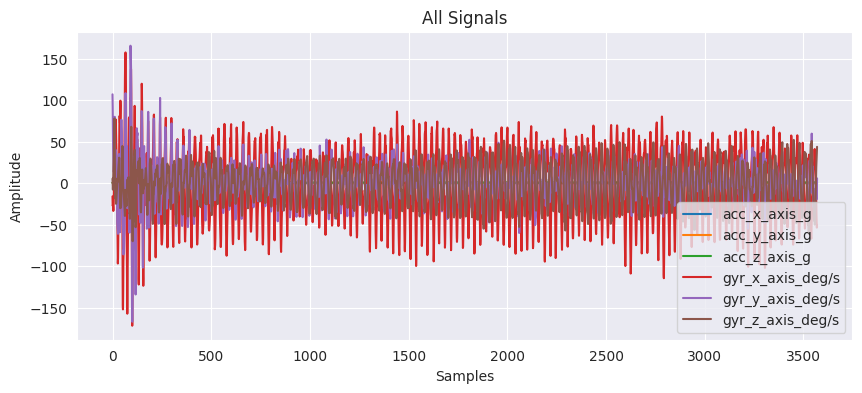

In [24]:
fig = visualization.plot_signal(
    data.values,
    title="All Signals",
    channels=data.columns.tolist()
)


### Plot Accelerometer Values

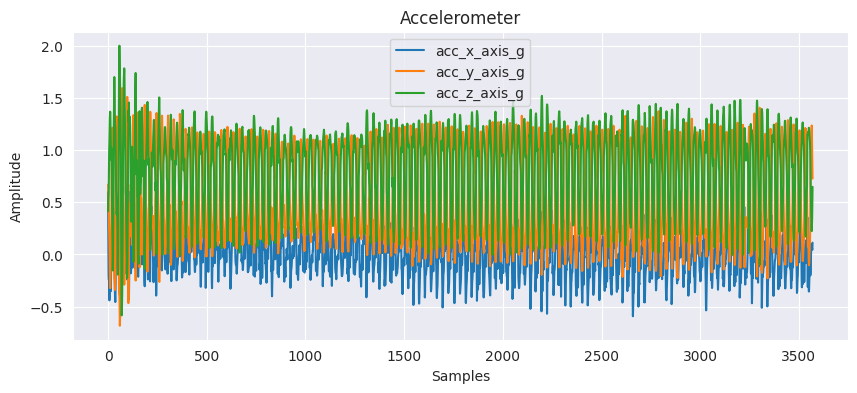

In [25]:
acc_fig = visualization.plot_signal(
    data.values[:, :3],
    title="Accelerometer",
    channels=data.columns.tolist()[:3]
)

## Step 2: Properties extraction

We will extract the magnitude of the acceleration signals (x, y, z) by calling the
appropriate function of the module

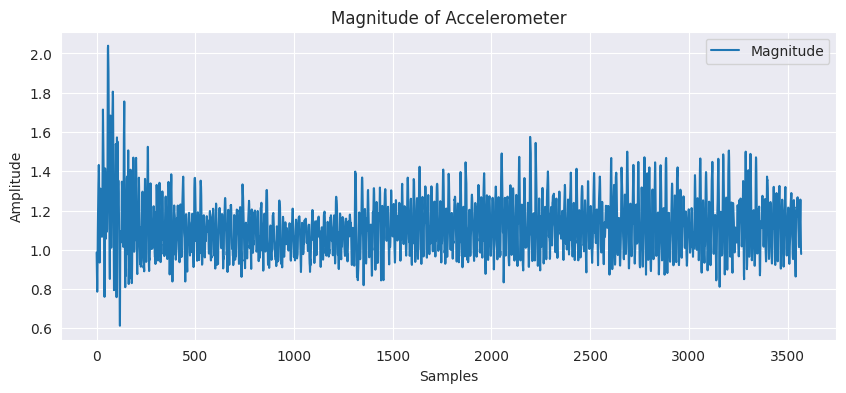

In [26]:
acc_data = data.values[:, :3]

mag = properties.magnitude_signal(acc_data)

mag_acc_fig = visualization.plot_signal(
    mag,
    title="Magnitude of Accelerometer",
    channels=["Magnitude"]
)


## Step 3: Spectrogram

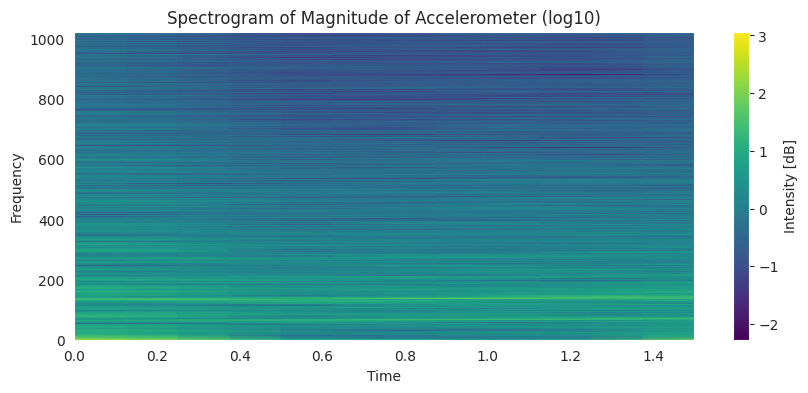

In [27]:
spec, sr = _spectrum.spectrogram(y=mag.T, n_fft=2048, hop_length=512)

f = np.fft.rfftfreq(sr, 1 / sr)
x = np.arange(spec.shape[1]) * 512 / sr

spec_fig = visualization.plot_spectrogram(
    spec=spec,
    f=f,
    x=x,
    log="log10",
    title="Spectrogram of Magnitude of Accelerometer (log10)",
    x_axis_name="Time"
    )
